## Customer Purchase Prediction using Decision Tree Regressor

## Libraries Used  

In this project, the following libraries were used:  

- **pandas**: To handle data manipulation and analysis.  
- **numpy**: For numerical operations.  
- **seaborn**: To visualize data.  
- **sklearn.model_selection**: For splitting the dataset into training and testing sets.  
- **sklearn.ensemble**: For using the **Decision Tree Regressor** model.  
- **sklearn.metrics**: To evaluate the model using metrics like **Mean Squared Error** and **R² score**.  
- **matplotlib.pyplot**: For visualizing the decision tree.  


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import tree


## Dataset Overview

The dataset consists of customer purchase data and includes several columns representing various customer features such as age, income, and shopping habits. The target variable is `LoyaltyProgram`, which indicates whether a customer has enrolled in a loyalty program.

In [4]:
data = pd.read_csv(r"C:\Users\devad\Downloads\customer_purchase_data.csv")
data

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


## Data Exploration


### Checking for Missing Values

The dataset does not contain any missing (null) values. Here's a summary of the data:

In [5]:
data.isnull().sum()


Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

The output indicates no null values, so there’s no need for imputation or replacement of missing data.

### Statistical Summary

The dataset provides the following descriptive statistics:

In [6]:
data.describe()


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


## Data Preprocessing

Before model building, we ensure all features are numeric and prepared for model training. The target variable (`LoyaltyProgram`) is separated from the feature set, which contains the customer details.

In [7]:
x = data.drop(['LoyaltyProgram'], axis=1)
y = data['LoyaltyProgram']


### Train-Test Split

We split the dataset into training and testing sets (80% for training, 20% for testing) using:

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


## Model Building

The Decision Tree Regressor model is used to predict customer participation in the loyalty program. It is trained on the training data:

In [9]:
ar = DecisionTreeRegressor()
ar.fit(x_train, y_train)


DecisionTreeRegressor()

We then make predictions on the test data:

In [10]:
y_pred = ar.predict(x_test)

## Model Evaluation


### Mean Squared Error (MSE)

The MSE is calculated to evaluate the performance of the model:

In [11]:
mse = mean_squared_error(y_test, y_pred)
print("The mean squared error:", mse)


The mean squared error: 0.3466666666666667


The MSE value indicates how well the model is fitting the data. In this case, the value is 0.3466.

## R² Score

The R² score is used to assess the proportion of the variance in the dependent variable explained by the model:

In [12]:
r2 = r2_score(y_test, y_pred)
print("The R² score:", r2)


The R² score: -0.5844802193895688


## Model Visualization

The Decision Tree model can be visualized using `plot_tree`:

[Text(0.47178727048962216, 0.9782608695652174, 'x[7] <= 0.5\nsquared_error = 0.22\nsamples = 1200\nvalue = 0.328'),
 Text(0.2881852048962214, 0.9347826086956522, 'x[2] <= 59654.014\nsquared_error = 0.166\nsamples = 689\nvalue = 0.21'),
 Text(0.3799862376929218, 0.9565217391304348, 'True  '),
 Text(0.17323044172432145, 0.8913043478260869, 'x[5] <= 39.079\nsquared_error = 0.213\nsamples = 263\nvalue = 0.308'),
 Text(0.11016498137307078, 0.8478260869565217, 'x[6] <= 2.5\nsquared_error = 0.235\nsamples = 188\nvalue = 0.378'),
 Text(0.05747738158594997, 0.8043478260869565, 'x[0] <= 41.5\nsquared_error = 0.25\nsamples = 99\nvalue = 0.505'),
 Text(0.023416711016498136, 0.7608695652173914, 'x[5] <= 7.893\nsquared_error = 0.22\nsamples = 43\nvalue = 0.326'),
 Text(0.019159127195316657, 0.717391304347826, 'squared_error = 0.0\nsamples = 8\nvalue = 0.0'),
 Text(0.027674294837679615, 0.717391304347826, 'x[5] <= 11.776\nsquared_error = 0.24\nsamples = 35\nvalue = 0.4'),
 Text(0.019159127195316657, 

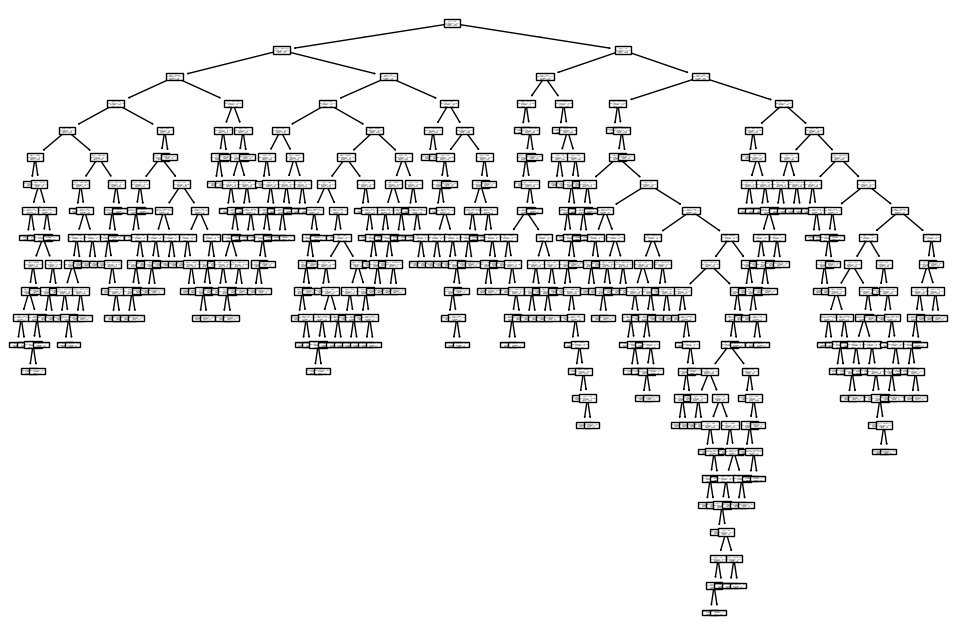

In [13]:
plt.figure(figsize=(12,8))
tree.plot_tree(ar)

This visualization helps to understand how the model makes decisions based on the features in the dataset.

## Conclusion

- The Decision Tree Regressor model was used to predict customer participation in the loyalty program.

- The dataset does not have missing values, and basic data exploration was performed to understand the features.

- The model evaluation shows that the R² score is relatively low, indicating the model could be improved further by experimenting with hyperparameter tuning or trying other algorithms.
- Future improvements could include testing with more complex models like Random Forest or XGBoost, which may improve performance.